How do the results from Galaxy Zoo sit on the $u-r$ v. $\Delta (g-i)$ plane?  Do they match the original morphological classification of Park05?

Is there a way that we can use the Galaxy Zoo results as "truth" data for determining the GV classification?

In [36]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

In [39]:
# Define a red - green color map
rg_cmap = LinearSegmentedColormap.from_list('rg', ['r', 'g'], N=256)
rg_cmap_r = LinearSegmentedColormap.from_list('rg', ['r', 'g'], N=256)

## Data

Galaxy Zoo data taken from Galaxy Zoo 2: Table 5 - Main sample, spectroscopic redshifts - https://data.galaxyzoo.org/

In [5]:
KIAS_filename = '/Users/kellydouglass/Documents/Research/data/SDSS/kias1033_5_MPAJHU_ZdustOS.txt'

In [28]:
galaxies = Table.read(KIAS_filename, format='ascii.commented_header')

# Separate based on Galaxy Zoo morphological classification

- `E` - smooth (ellipticals)
- `S` - features/disk (spirals and irregulars)
- `A` - stars and artifacts

In [34]:
smooth_boolean = galaxies['GZ_class'].astype('<U1') == 'E'
disk_boolean = galaxies['GZ_class'].astype('<U1') == 'S'
artifacts_boolean = galaxies['GZ_class'].astype('<U1') == 'A'

Note: This reduces all the strings down to just their first letter.

In [35]:
smooth = galaxies[smooth_boolean]
disk = galaxies[disk_boolean]
artifacts = galaxies[artifacts_boolean]

## Color v. color gradient

<IPython.core.display.Javascript object>


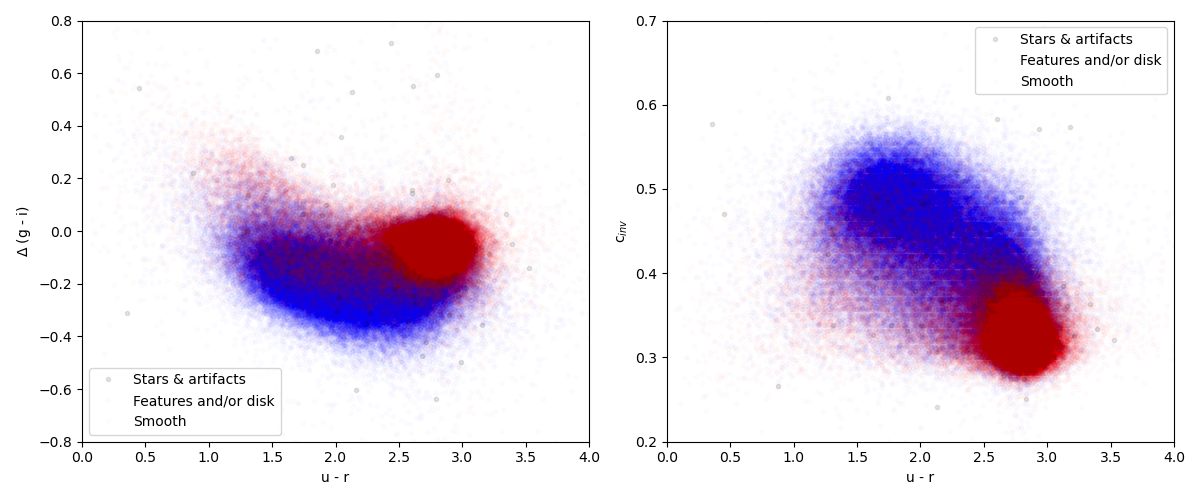

In [23]:
%matplotlib notebook

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(artifacts['u_r'], artifacts['cd'], 'k.', alpha=0.1, label='Stars & artifacts')
plt.plot(disk['u_r'], disk['cd'], 'b.', alpha=0.01, label='Features and/or disk')
plt.plot(smooth['u_r'], smooth['cd'], 'r.', alpha=0.01, label='Smooth')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r')
plt.ylabel('$\Delta$ (g - i)')

plt.legend()



plt.subplot(122)
plt.plot(artifacts['u_r'], artifacts['conx1'], 'k.', alpha=0.1, label='Stars & artifacts')
plt.plot(disk['u_r'], disk['conx1'], 'b.', alpha=0.01, label='Features and/or disk')
plt.plot(smooth['u_r'], smooth['conx1'], 'r.', alpha=0.01, label='Smooth')

plt.axis([0, 4, 0.2, 0.7])

plt.xlabel('u - r')
plt.ylabel('c$_{inv}$')

plt.legend()

plt.tight_layout();

## Color distribution

In [26]:
ur_bins = np.linspace(0,4.5,100)
NUVr_bins = np.linspace(0,10,100)

<IPython.core.display.Javascript object>


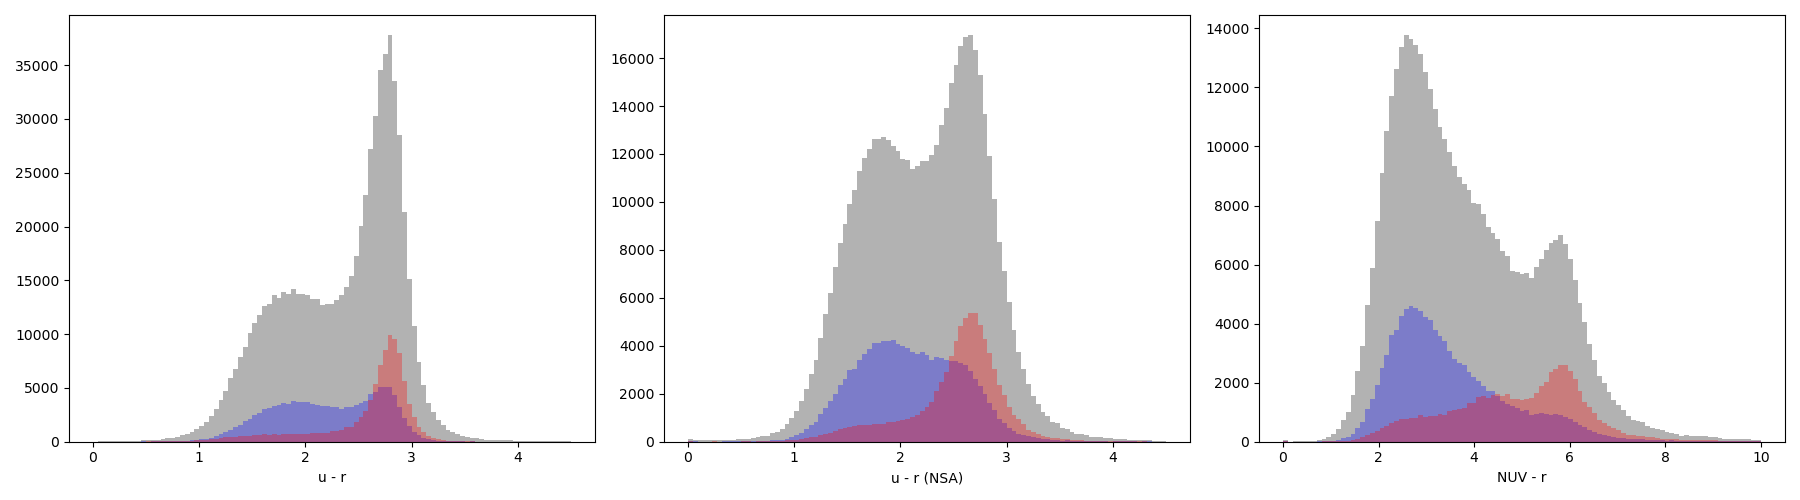

In [27]:
%matplotlib notebook

plt.figure(figsize=(18,5))


plt.subplot(131)
plt.hist(galaxies['u_r'], bins=ur_bins, alpha=0.3, facecolor='k')
plt.hist(disk['u_r'], bins=ur_bins, alpha=0.3, facecolor='b')
plt.hist(smooth['u_r'], bins=ur_bins, alpha=0.3, facecolor='r')

plt.xlabel('u - r')



plt.subplot(132)
plt.hist(galaxies['u_r_NSA'], bins=ur_bins, alpha=0.3, facecolor='k')
plt.hist(disk['u_r_NSA'], bins=ur_bins, alpha=0.3, facecolor='b')
plt.hist(smooth['u_r_NSA'], bins=ur_bins, alpha=0.3, facecolor='r')

plt.xlabel('u - r (NSA)')



plt.subplot(133)
plt.hist(galaxies['NUV_r'], bins=NUVr_bins, alpha=0.3, facecolor='k')
plt.hist(disk['NUV_r'], bins=NUVr_bins, alpha=0.3, facecolor='b')
plt.hist(smooth['NUV_r'], bins=NUVr_bins, alpha=0.3, facecolor='r')

plt.xlabel('NUV - r')

plt.tight_layout();

# As a function of the votes

How does the relative number of votes for smooth v. features or disks correlate with the color, color gradient, and inverse concentration index within the above categories?

<IPython.core.display.Javascript object>


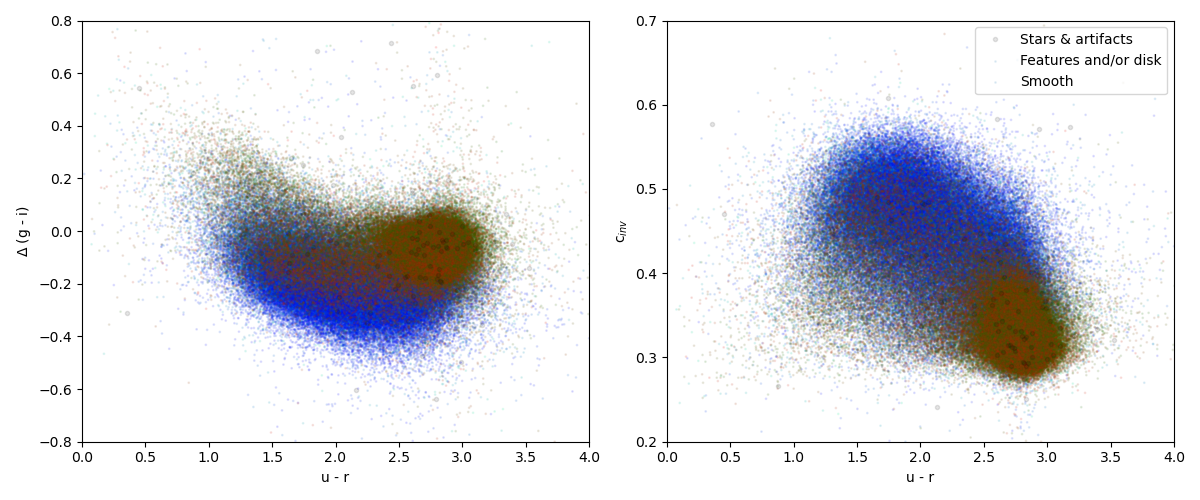

In [41]:
%matplotlib notebook

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(artifacts['u_r'], artifacts['cd'], 'k.', alpha=0.1, label='Stars & artifacts')
plt.scatter(disk['u_r'], disk['cd'], s=1, c=disk['GZ_features_frac'], 
            cmap=cm.winter_r, alpha=0.1, label='Features and/or disk')
plt.scatter(smooth['u_r'], smooth['cd'], s=1, c=smooth['GZ_smooth_frac'], 
            cmap=rg_cmap_r, alpha=0.1, label='Smooth')

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u - r')
plt.ylabel('$\Delta$ (g - i)')



plt.subplot(122)
plt.plot(artifacts['u_r'], artifacts['conx1'], 'k.', alpha=0.1, label='Stars & artifacts')
plt.scatter(disk['u_r'], disk['conx1'], s=1, c=disk['GZ_features_frac'], 
            cmap=cm.winter_r, alpha=0.1, label='Features and/or disk')
plt.scatter(smooth['u_r'], smooth['conx1'], s=1, c=smooth['GZ_smooth_frac'], 
            cmap=rg_cmap_r, alpha=0.1, label='Smooth')

plt.axis([0, 4, 0.2, 0.7])

plt.xlabel('u - r')
plt.ylabel('c$_{inv}$')

plt.legend()

plt.tight_layout();

<IPython.core.display.Javascript object>


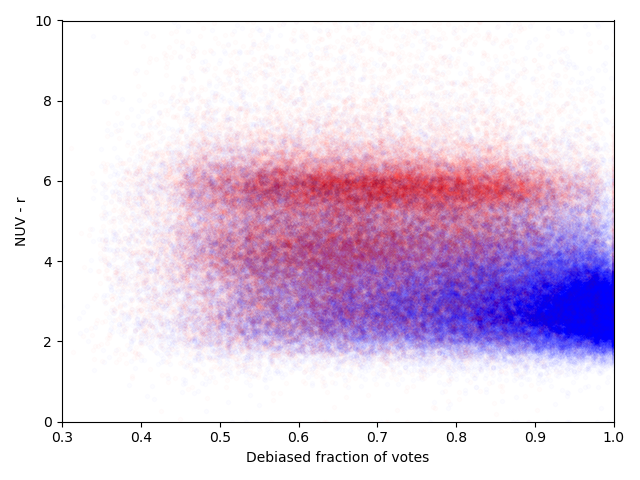

In [46]:
%matplotlib notebook

plt.figure()

plt.plot(disk['GZ_features_frac'], disk['NUV_r'], 'b.', alpha=0.01)
plt.plot(smooth['GZ_smooth_frac'], smooth['NUV_r'], 'r.', alpha=0.01)

plt.axis([0.3, 1, 0, 10])

plt.xlabel('Debiased fraction of votes')
plt.ylabel('NUV - r')

plt.tight_layout();